<a href="https://colab.research.google.com/github/Ongkysetia/C23-PS067/blob/main/CAPSTONE_with_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTALLING KAGGLE PACKAGE**

In [ ]:
!pip install -q kaggle

In [ ]:
#Import Kaggle API from github
!wget https://github.com/Ongkysetia/C23-PS067/blob/main/kaggle.json

--2023-05-28 04:54:58--  https://github.com/Ongkysetia/C23-PS067/blob/main/kaggle.json
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘kaggle.json.1’

kaggle.json.1           [ <=>                ] 142.15K  --.-KB/s    in 0.02s   

2023-05-28 04:54:58 (5.82 MB/s) - ‘kaggle.json.1’ saved [145557]



**SET KAGGLE ENVIRONMENT**

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!pwd

/content


In [ ]:
import os
os.environ['Kaggle_config_dir'] = "/content"
os.environ['KAGGLE_USERNAME'] = 'ongkysetia'
os.environ['KAGGLE_KEY'] = '3c0018d4bb1f5b2886a971ce3b9839aa'

!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**IMPORT DATASET FROM KAGGLE**

In [ ]:
!kaggle datasets download -d ongkysetia/trash-or-coral
!kaggle datasets download -d ongkysetia/val-trash-or-coral

trash-or-coral.zip: Skipping, found more recently modified local copy (use --force to force download)
val-trash-or-coral.zip: Skipping, found more recently modified local copy (use --force to force download)


**UNZIPPING DATASET**

In [ ]:
import zipfile

**Extract File Trash and Coral**

In [ ]:
local_zip = '/content/trash-or-coral.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

local_zip = '/content/val-trash-or-coral.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')

zip_ref.close()


**Split Dataset Between Training Data And Validation Data**

In [ ]:
import os

# Directory with training Coral pictures
train_Coral_dir = os.path.join('/tmp/Trash-or-Coral/Coral')

# Directory with training Trash pictures
train_Trash_dir = os.path.join('/tmp/Trash-or-Coral/Trash')

# Directory with validation Coral pictures
validation_Coral_dir = os.path.join('/tmp/Val-Trash-or-Coral/valcoral')

# Directory with validation Trash pictures
validation_Trash_dir = os.path.join('/tmp/Val-Trash-or-Coral/valtrash')

In [ ]:
train_Coral_names = os.listdir(train_Coral_dir)
print(f'TRAIN SET CORALS: {train_Coral_names[:10]}')

train_Trash_names = os.listdir(train_Trash_dir)
print(f'TRAIN SET Trashes: {train_Trash_names[:10]}')

validation_Coral_names = os.listdir(validation_Coral_dir)
print(f'VAL SET Corals: {validation_Coral_names[:10]}')

validation_Trash_names = os.listdir(validation_Trash_dir)
print(f'VAL SET Trashes: {validation_Trash_names[:10]}')

TRAIN SET CORALS: ['542.png', '151.png', 'NRTDA8Z1OTCS.jpg', 'N7JP0KRQAY7K.jpg', '172.png', '12Y8UXND3LRZ.jpg', '190.png', '187.png', '500.png', '103.png']
TRAIN SET Trashes: ['obj1617_frame0000240.jpg', 'obj1202_frame0000610.jpg', 'obj1658_frame0000630.jpg', 'obj1502_frame0000166.jpg', 'obj1667_frame0000102.jpg', 'obj0747_frame0000045.jpg', 'obj0751_frame0000183.jpg', 'obj1502_frame0000103.jpg', 'obj1658_frame0001182.jpg', 'bio0016_frame0000460.jpg']
VAL SET Corals: ['542.png', '151.png', '172.png', '190.png', '187.png', '500.png', '103.png', '501.png', '377.png', '385.png']
VAL SET Trashes: ['obj0081_frame0000014.jpg', 'obj1623_frame0000069.jpg', 'obj0078_frame0000049.jpg', 'obj1616_frame0000273.jpg', 'obj1614_frame0000098.jpg', 'obj0081_frame0000052.jpg', 'obj1617_frame0000090.jpg', 'obj1302_frame0000033.jpg', 'obj1606_frame0000201.jpg', 'obj1620_frame0000364.jpg']


**Find Total Images Training and Validation Data**

In [ ]:
print(f'total training coral images: {len(os.listdir(train_Coral_dir))}')
print(f'total training trash images: {len(os.listdir(train_Trash_dir))}')
print(f'total validation coral images: {len(os.listdir(validation_Coral_dir))}')
print(f'total validation trash images: {len(os.listdir(validation_Trash_dir))}')

total training coral images: 1515
total training trash images: 5720
total validation coral images: 780
total validation trash images: 820


**Show Sample of Training and Validation Dataset**

Sample Train Trash:


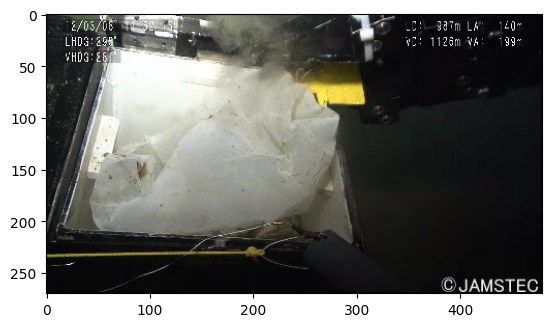


Sample Train Coral:


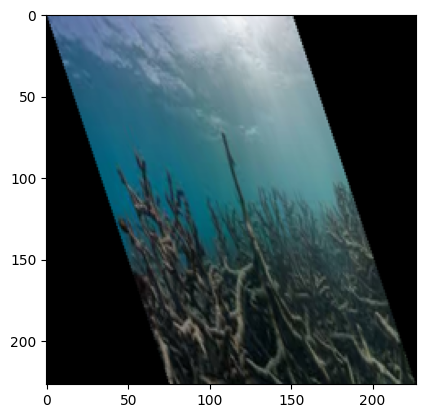


Sample Validation Trash:


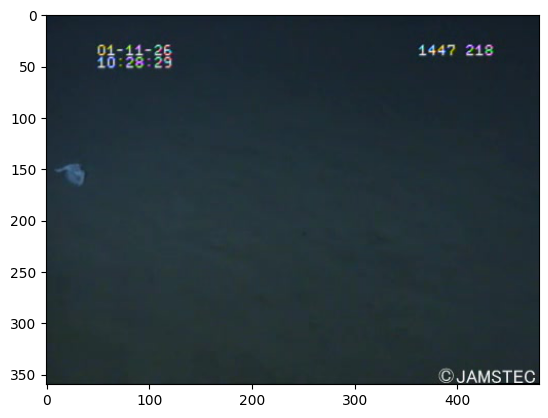


Sample Validation Coral:


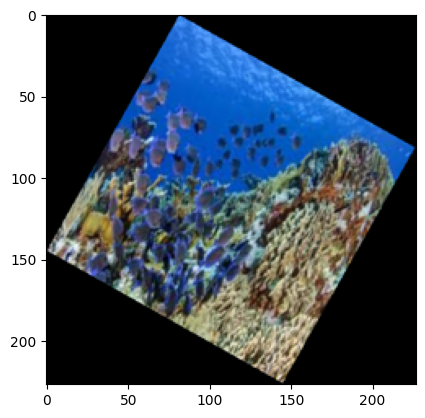

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("Sample Train Trash:")
plt.imshow(load_img(f"{os.path.join(train_Trash_dir, os.listdir(train_Trash_dir)[0])}"))
plt.show()

print("\nSample Train Coral:")
plt.imshow(load_img(f"{os.path.join(train_Coral_dir, os.listdir(train_Coral_dir)[0])}"))
plt.show()

print("\nSample Validation Trash:")
plt.imshow(load_img(f"{os.path.join(validation_Trash_dir, os.listdir(validation_Trash_dir)[0])}"))
plt.show()

print("\nSample Validation Coral:")
plt.imshow(load_img(f"{os.path.join(validation_Coral_dir, os.listdir(validation_Coral_dir)[0])}"))
plt.show()

**SHAPE OF TRAINING AND VALIDATION DATASET**

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
# Load the first example of a Train Trash
sample_image_ttrash  = load_img(f"{os.path.join(train_Trash_dir, os.listdir(train_Trash_dir)[0])}")

# Convert the image into its numpy array representation
sample_array_ttrash = img_to_array(sample_image_ttrash)

print(f"Each image has shape: {sample_array_ttrash.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array_ttrash)}")

# Load the first example of a Train Coral
sample_image_tcoral  = load_img(f"{os.path.join(train_Coral_dir, os.listdir(train_Coral_dir)[0])}")

# Convert the image into its numpy array representation
sample_array_tcoral = img_to_array(sample_image_tcoral)

print(f"Each image has shape: {sample_array_tcoral.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array_tcoral)}")

# Load the first example of a Validation Trash
sample_image_vtrash  = load_img(f"{os.path.join(validation_Trash_dir, os.listdir(validation_Trash_dir)[0])}")

# Convert the image into its numpy array representation
sample_array_vtrash = img_to_array(sample_image_vtrash)

print(f"Each image has shape: {sample_array_vtrash.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array_vtrash)}")

# Load the first example of a Validation Coral
sample_image_vcoral  = load_img(f"{os.path.join(validation_Coral_dir, os.listdir(validation_Coral_dir)[0])}")

# Convert the image into its numpy array representation
sample_array_vcoral = img_to_array(sample_image_vcoral)

print(f"Each image has shape: {sample_array_vcoral.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array_vcoral)}")

Each image has shape: (270, 480, 3)
The maximum pixel value used is: 255.0
Each image has shape: (227, 227, 3)
The maximum pixel value used is: 248.0
Each image has shape: (360, 480, 3)
The maximum pixel value used is: 255.0
Each image has shape: (227, 227, 3)
The maximum pixel value used is: 255.0


**ANOTHER SHOWING THE LARGER SAMPLE OF TRAINING AND VALIDATION DATASET**

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

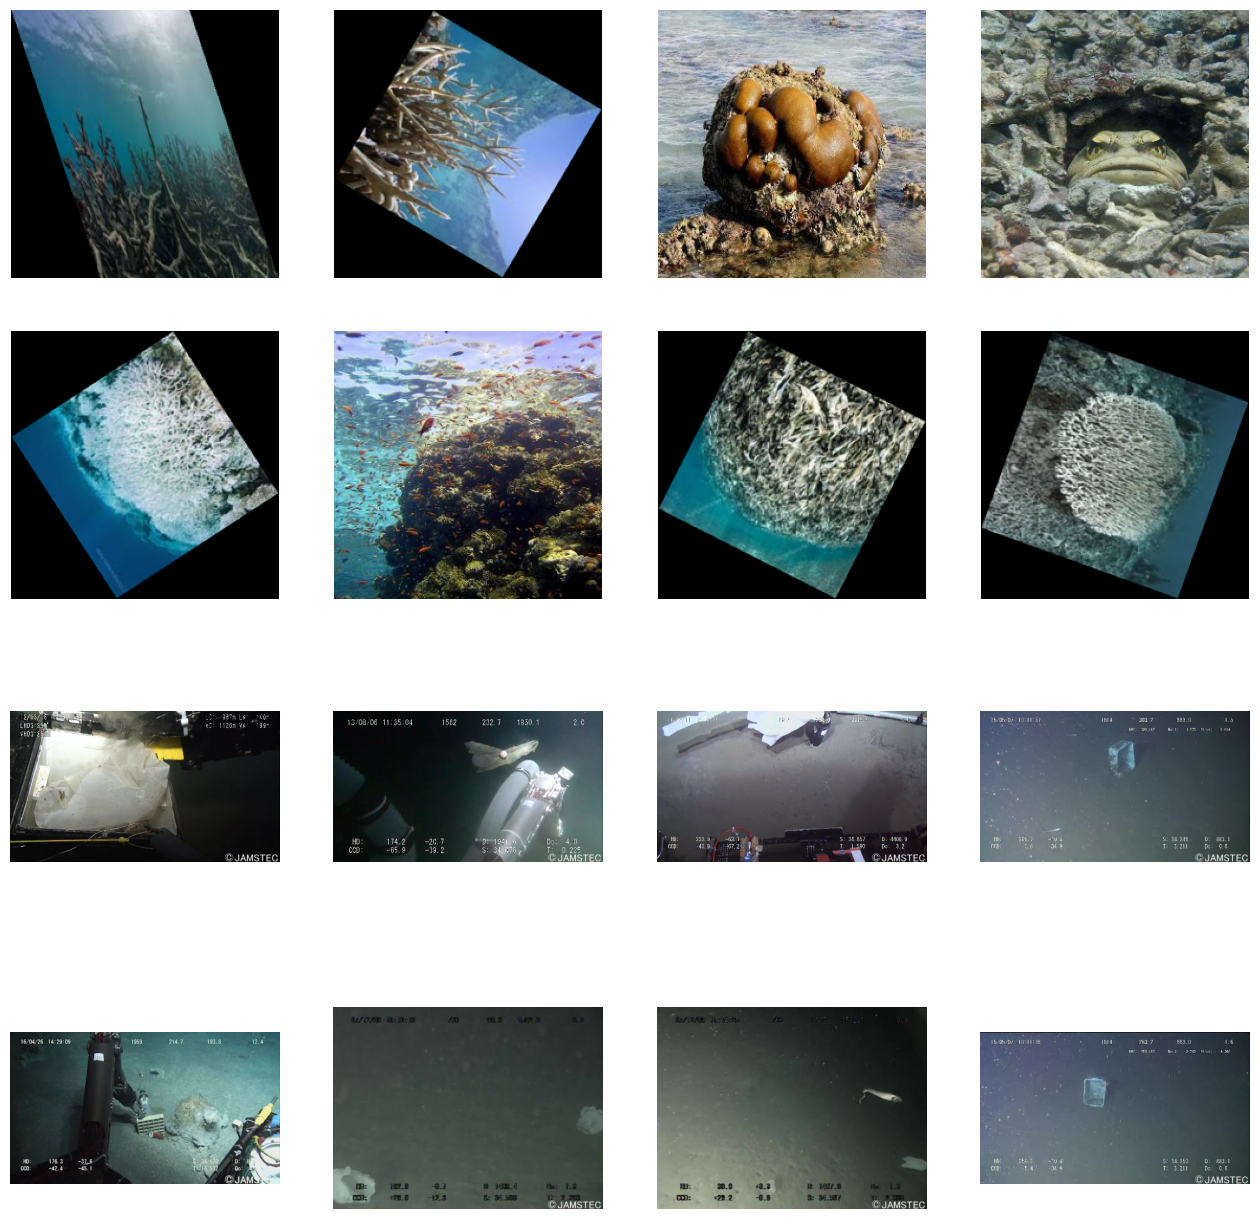

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_coral_pix = [os.path.join(train_Coral_dir, fname) 
                for fname in train_Coral_names[pic_index-8:pic_index]]
next_trash_pix = [os.path.join(train_Trash_dir, fname) 
                for fname in train_Trash_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_coral_pix+next_trash_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**MAKE A MODEL FOR TRAINING DATASET**
This Model Using : 


*   2D Convolutional Neural Network Layers
*   Maxpooling2D Layers


*   Flatten Layers
*   Dense Layers

The activation using relu and sigmoid for the last dense because in this classification use binary classification.
The input shape for this model is 150x150





In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

**COMPILING MODEL**

We use binary crossentropy for the loss and for the optimizer we use RMSprop with learning rate 0.001

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

**RESCALED TRAINING AND VALIDATION DATASET USING ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/Trash-or-Coral',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=128,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/Val-Trash-or-Coral',  # This is the source directory for validation images
        target_size=(150, 150),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 7235 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


**TRAINING RESCALED MODEL USING TRAIN DATASET AND VALIDATION MODEL FOR 15 EPOCHS**

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 38s 4s/step - loss: 0.6421 - accuracy: 0.7256 - val_loss: 0.8572 - val_accuracy: 0.5234
Epoch 2/15
8/8 [==============================] - 47s 6s/step - loss: 0.5747 - accuracy: 0.7734 - val_loss: 0.7560 - val_accuracy: 0.5117
Epoch 3/15
8/8 [==============================] - 33s 4s/step - loss: 0.4676 - accuracy: 0.7852 - val_loss: 0.5618 - val_accuracy: 0.5547
Epoch 4/15
8/8 [==============================] - 32s 4s/step - loss: 0.2807 - accuracy: 0.8623 - val_loss: 0.1222 - val_accuracy: 0.9844
Epoch 5/15
8/8 [==============================] - 35s 4s/step - loss: 0.2189 - accuracy: 0.9045 - val_loss: 0.1953 - val_accuracy: 0.9570
Epoch 6/15
8/8 [==============================] - 36s 4s/step - loss: 0.1586 - accuracy: 0.9375 - val_loss: 0.2522 - val_accuracy: 0.9375
Epoch 7/15
8/8 [==============================] - 32s 4s/step - loss: 0.1100 - accuracy: 0.9658 - val_loss: 0.0662 - val_accuracy: 0.9844
Epoch 8/15
8/8 [==================

**MODEL PREDICTION**

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Trash")
  else:
    print(fn + " is a Coral")
 

Saving 21.png to 21.png
1/1 [==============================] - 0s 38ms/step
[0.00234755]
21.png is a Coral


**VISUALIZING INTERMEDIATE REPRESENTATIONS**

1/1 [==============================] - 0s 200ms/step


<ipython-input-22-127ac8cd6f5a>:47: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


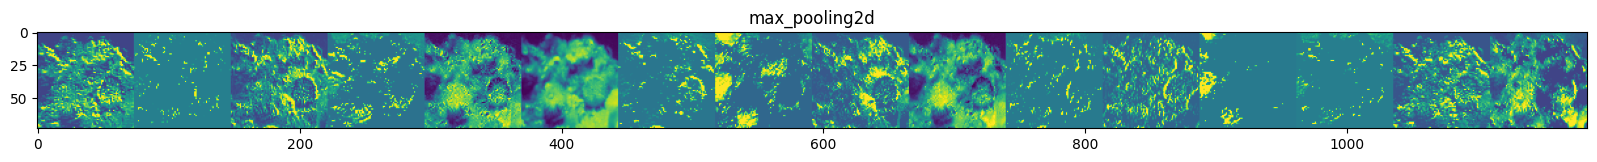

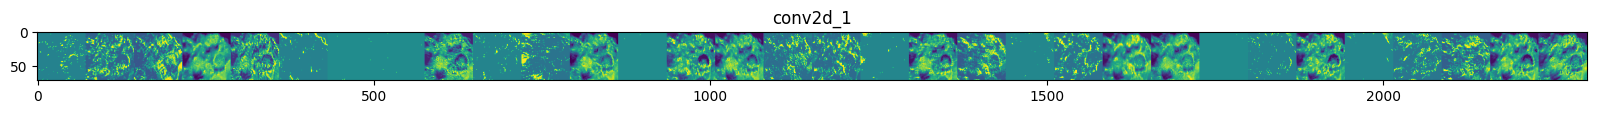

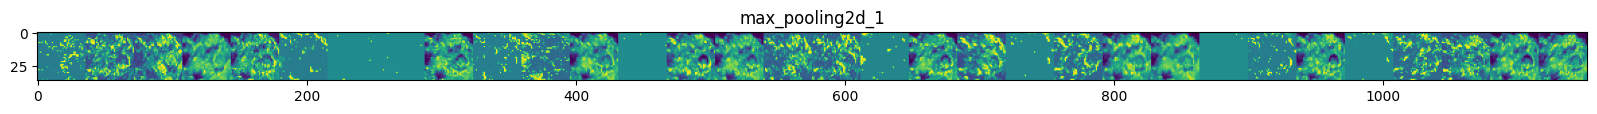

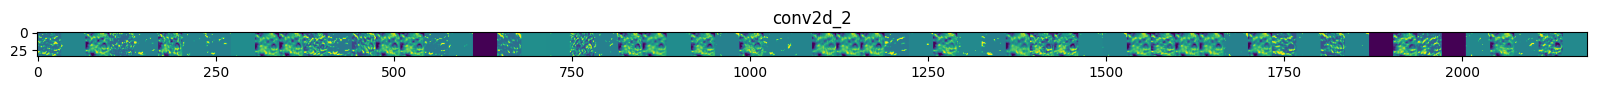

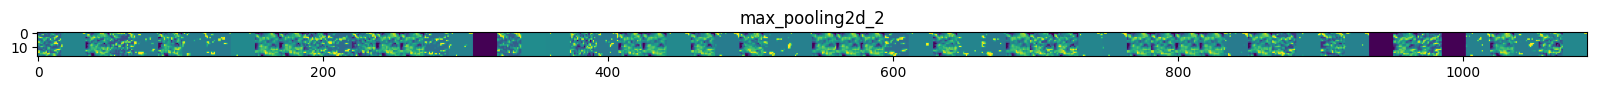

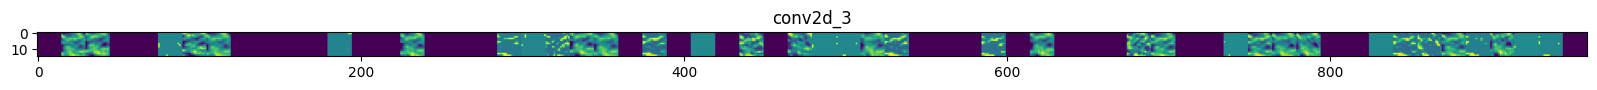

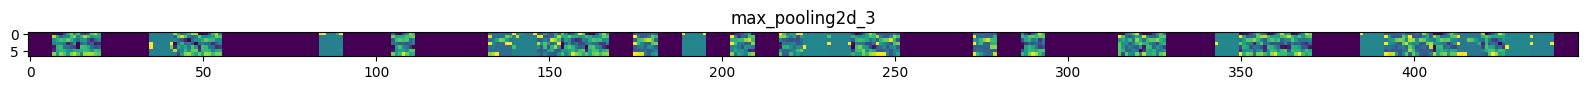

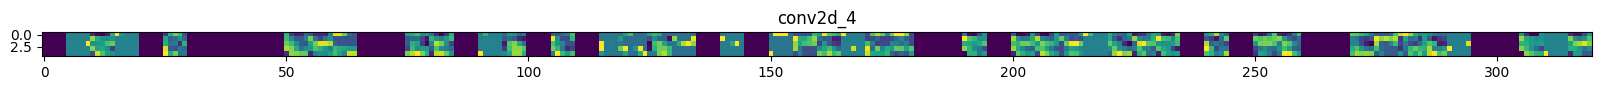

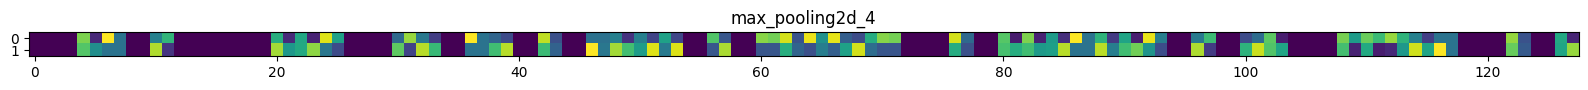

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
Trash_img_files = [os.path.join(train_Trash_dir, f) for f in train_Trash_names]
Coral_img_files = [os.path.join(train_Coral_dir, f) for f in train_Coral_names]
img_path = random.choice(Trash_img_files + Coral_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
  

**SAVING MODEL DATA**

In [ ]:
model.save('/content/my_model.h5')

In [ ]:
Trash_Coral = "exp_saved_model"

In [ ]:
tf.saved_model.save(model, Trash_Coral)

In [ ]:
%%bash -s $Trash_Coral
saved_model_cli show --dir $1 --tag_set serve --signature_def serving_default

The given SavedModel SignatureDef contains the following input(s):
  inputs['conv2d_input'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 150, 150, 3)
      name: serving_default_conv2d_input:0
The given SavedModel SignatureDef contains the following output(s):
  outputs['dense_1'] tensor_info:
      dtype: DT_FLOAT
      shape: (-1, 1)
      name: StatefulPartitionedCall:0
Method name is: tensorflow/serving/predict


2023-05-28 05:08:40.066614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
loaded = tf.saved_model.load(Trash_Coral)

In [ ]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_1': TensorSpec(shape=(None, 1), dtype=tf.float32, name='dense_1')}


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(Trash_Coral)

In [ ]:
tflite_model = converter.convert()
tflite_model_file = '/content/convert_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download('convert_model.tflite')
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
saved_model_path = "/content/my_model.h5"
!tensorflowjs_converter --input_format=keras {saved_model_path } ./

2023-05-28 05:09:11.780427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
